## Linear advection

$$ \phi_j^{n+1} = \phi_j^{n-1} - c(\phi_{j+1}^n - \phi_{j-1}^n)$$
$$ c = {u {\Delta t \over \Delta x}}$$

The CTCS scheme is conditionally stable with CFL condition
$$ |c| = |u| {\Delta t \over \Delta x} \leq 1$$

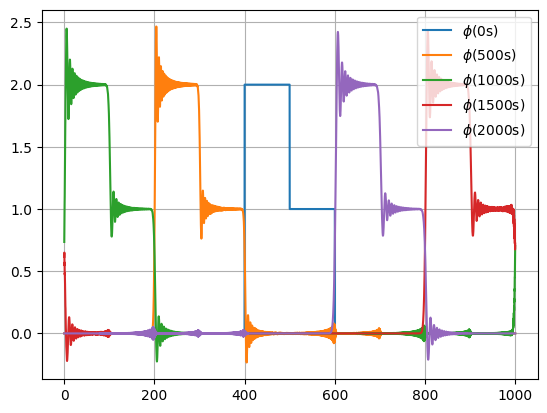

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# func
def func(x):
    if x < 400 or x > 600:
        return 0.
    elif x < 500: return 2
    else: return 1

# scheme
def ftfs(y0):
    return (1+c)*y0 - c*np.roll(y0, -1)
def ftbs(y0):
    return (1-c)*y0 + c*np.roll(y0, +1)
def ctcs(y0, y1):
    return y0 - c*(np.roll(y1, -1) - np.roll(y1, +1))

# filter
def rafilter(y0, y1, y2):
    d = alpha*(y0 - 2*y1 + y2)
    return y1 + d, y2
def rawfilter(y0, y1, y2):
    d = alpha*(y0 - 2*y1 + y2)
    return y1 + beta*d, y2 - (beta - 1)*d

# main loop
def run(x0, y0, filter):
    t = 0
    y1 = ftbs(y0) if u < 0 else ftfs(y0) #ftbs & ftbs
    plt.plot(x0, y0, label="$\phi$(" + str(int(np.floor(t))) + "s)")
    while t < duration:
        t = t + dt
        y2 = ctcs(y0, y1)
        if filter == "rawfilter":
            y0, y1 = rawfilter(y0, y1, y2)
        else: y0, y1 = rafilter(y0, y1, y2)
        if t % tinterval < dt:
            plt.plot(x0, y2, label="$\phi$(" + str(int(np.floor(t))) + "s)")
    plt.legend()
    plt.grid()
    plt.show()
    
# initial condition
dx = 0.25; dt = 0.1; u = -0.4 # control vars
c = u*dt/dx # auxiliary vars
alpha = 0.05; beta = 0.53 # filter
tinterval = 500; duration = 2000+10 # time
x0 = np.arange(0, 1000+dx, dx)
y0 = np.vectorize(func)(x0)

# run
run(x0, y0, "rafilter")

The solution has two mode: physical mode and computational mode
Apply filter to reduce noise from computational mode

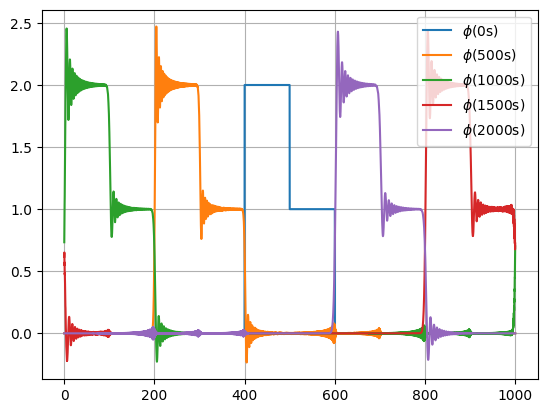

In [2]:
# RAW filter
run(x0, y0, "rawfilter")

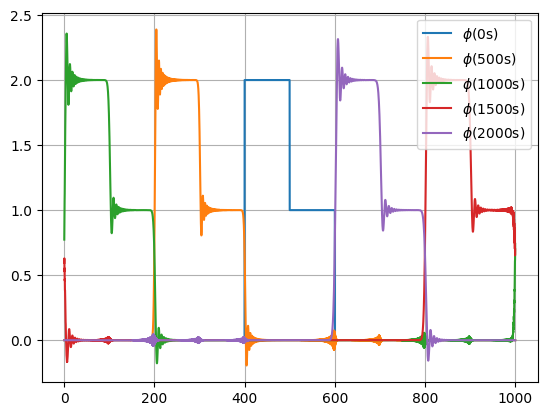

In [3]:
# RA filter
alpha = 0.1; beta = 0.6
run(x0, y0, "rafilter")

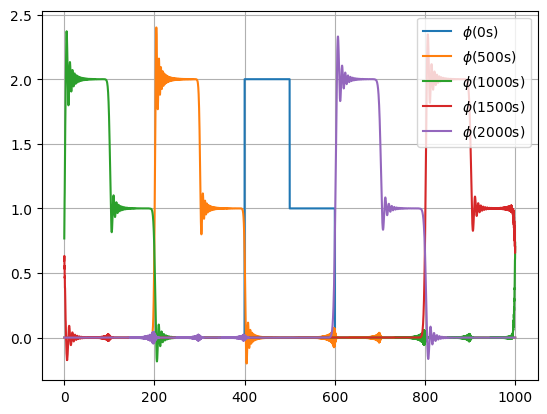

In [4]:
#RAW filter
run(x0, y0, "rawfilter")

The computational mode comes from quadratic interpolation
The computational mode oscilates on time and come to opposite direction